# ML pipeline
In this notebook, we go through the pipeline we have used for our ML method.

In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the training data into feature matrix, class labels, and event ids:

In [3]:
from helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

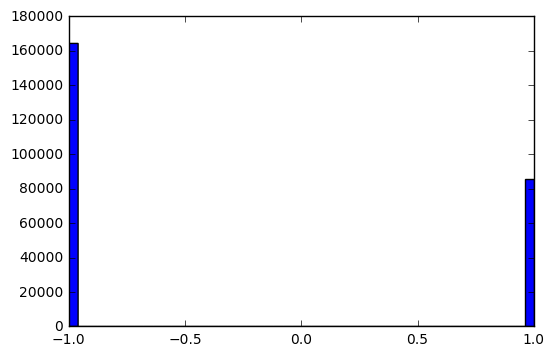

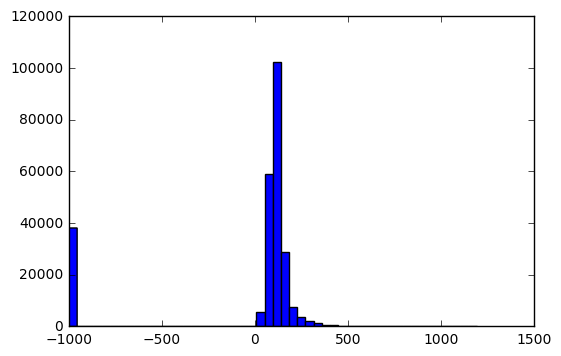

In [4]:
hist_res = 50

plt.figure(1);
plt.hist(y, bins=hist_res);
plt.figure(2);
plt.hist(tX[:,0], bins=hist_res);

# Clean the data

We replace the outliers (-999) with 0

181886
outlier ratio: 0.727544


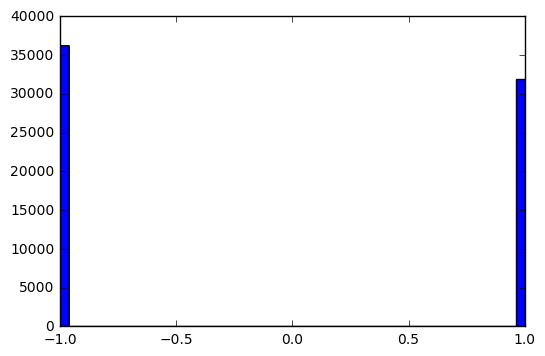

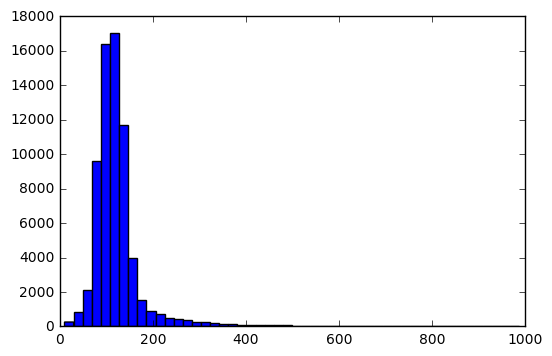

In [5]:
N = tX.shape[0]
D = tX.shape[1]
no_samples = N

cnt = 0
exclude = []
for n in range(no_samples):
    for d in range(D):
        if tX[n,d] == -999.0:
            exclude.append(n)
            cnt = cnt + 1
            break

y_c=np.delete(y,exclude,0);
tX_c=np.delete(tX,exclude,0);      

print(cnt)
print('outlier ratio: %f' % (float(cnt)/no_samples))
plt.figure(3);
plt.hist(y_c[0:(no_samples-cnt)], bins=hist_res);
plt.figure(4);
plt.hist(tX_c[0:(no_samples-cnt),0], bins=hist_res);

# Standardise and pre-process data

We standardise the data matrix, add a column of 1s to the data matrix, and change the -1s to 0s in y

In [6]:
from helpers import standardize
tX_norm, mean, std = standardize(tX, None, None)
y_shifted = np.array([1 if i==1 else 0 for i in y])

# Logistic regression

As we are working on a binary classification problem, we use logistic regression

In [7]:
from scripts import logistic_regression
logistic_regression(y_shifted, tX_norm, gamma=0.0004, max_iter=100, batch_size=N/100)

C:\Users\Fearnley\Documents\EPFL\Machine learning\ML_pro_1\pro1\scripts.py:162: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y_batch = np.zeros((batch_size,1))
C:\Users\Fearnley\Documents\EPFL\Machine learning\ML_pro_1\pro1\helpers.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]


(array([ 1239.00455997]), array([[-0.90397111],
        [ 0.26230359],
        [-0.67181813],
        [-0.76827851],
        [ 0.19905527],
        [-0.08006223],
        [ 0.98574327],
        [-0.10165838],
        [ 0.80173062],
        [-0.03216294],
        [-0.06632805],
        [-0.52413631],
        [ 0.2606351 ],
        [-0.08563475],
        [ 0.50711216],
        [ 0.00520544],
        [ 0.01815349],
        [ 0.7081983 ],
        [-0.00881933],
        [ 0.00791505],
        [ 0.24005955],
        [ 0.02556142],
        [-0.2400306 ],
        [-0.42319279],
        [ 0.10927118],
        [ 0.1208677 ],
        [ 0.12101108],
        [-0.09488135],
        [-0.08819684],
        [-0.0879341 ],
        [-0.35368151]]))

# Cross validation

We cross-validate the logistic regression method with 4-fold validation and output the average accuracy.

In [9]:
from cross_validation import cross_validation
average_accuracy, accuracies = cross_validation(y_shifted, tX_norm, 0.0004, method='logistic_regression')
print(average_accuracy)

C:\Users\Fearnley\Documents\EPFL\Machine learning\ML_pro_1\pro1\scripts.py:162: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y_batch = np.zeros((batch_size,1))
C:\Users\Fearnley\Documents\EPFL\Machine learning\ML_pro_1\pro1\helpers.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]


0.74222


Now we search for the value of gamma that gives us the maximum accuracy.

C:\Users\Fearnley\Documents\EPFL\Machine learning\ML_pro_1\pro1\scripts.py:162: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y_batch = np.zeros((batch_size,1))
C:\Users\Fearnley\Documents\EPFL\Machine learning\ML_pro_1\pro1\helpers.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]


Gamma: 0.001, Average Accuracy: 0.670328
Gamma: 0.0005994842503189409, Average Accuracy: 0.698604
Gamma: 0.00035938136638046257, Average Accuracy: 0.744648
Gamma: 0.00021544346900318845, Average Accuracy: 0.745236
Gamma: 0.0001291549665014884, Average Accuracy: 0.742036
Gamma: 7.742636826811278e-05, Average Accuracy: 0.737368
Gamma: 4.641588833612782e-05, Average Accuracy: 0.732276
Gamma: 2.782559402207126e-05, Average Accuracy: 0.7265839999999999
Gamma: 1.6681005372000593e-05, Average Accuracy: 0.718332
Gamma: 1e-05, Average Accuracy: 0.706332
Maximum Accuracy: 0.745236, Optimal Gamma: 0.00021544346900318845


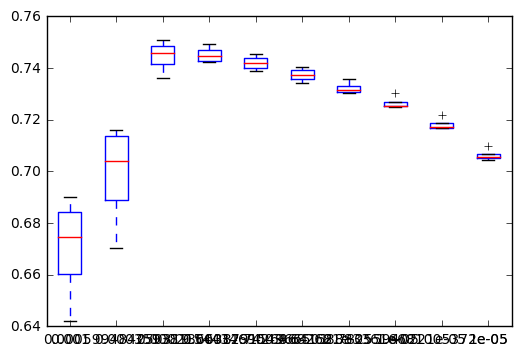

In [29]:
from cross_validation import find_optimal_gamma
optimal_gamma = find_optimal_gamma(y_shifted, tX_norm)

## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)